In [15]:
import pandas as pd

ratings = pd.read_csv("./input/data_train.csv").rename(
    columns={"row": "user", "col": "item", "data": "rating"}
)
ratings.head()


,user,item,rating
0,0,53,1.0
1,0,209,1.0
2,0,223,1.0
3,0,249,1.0
4,0,435,1.0


The average number of ratings per user is: 387.22813186813187
The median of the number of ratings per user is: 340.0


<AxesSubplot:xlabel='number of ratings', ylabel='number of users'>

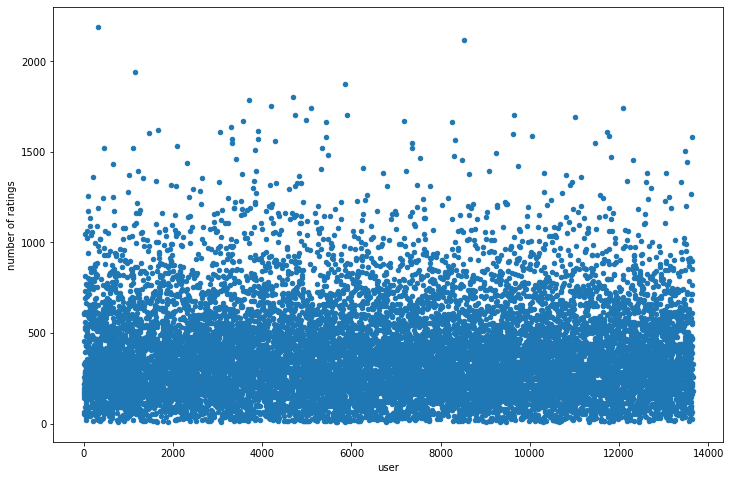

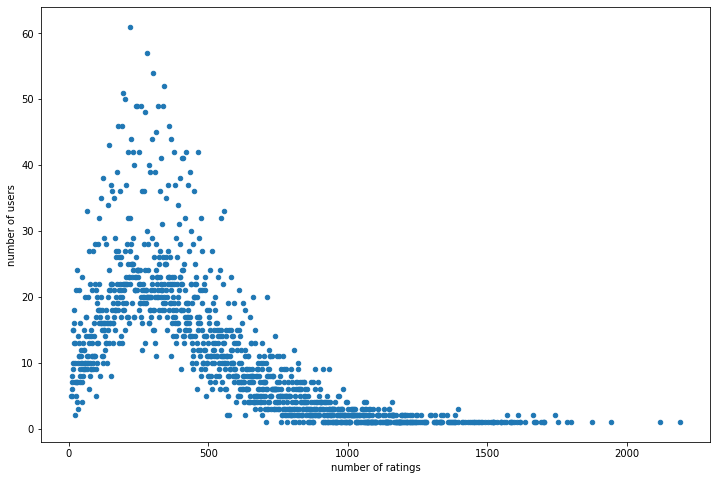

In [16]:
num_ratings_per_user = ratings.groupby("user").count()["rating"]
print(
    "The average number of ratings per user is: {}".format(num_ratings_per_user.mean())
)
print(
    "The median of the number of ratings per user is: {}".format(
        num_ratings_per_user.median()
    )
)

num_ratings_per_user = num_ratings_per_user.reset_index(level=["user"])
num_ratings_per_user = num_ratings_per_user.rename(
    columns={"rating": "number of ratings"}
)

num_users_per_num_ratings = (
    num_ratings_per_user.groupby("number of ratings")
    .count()
    .reset_index(level=["number of ratings"])
    .rename(columns={"user": "number of users"})
)

num_ratings_per_user.plot(
    kind="scatter", x="user", y="number of ratings", figsize=(12, 8)
)

num_users_per_num_ratings.plot(
    kind="scatter", x="number of ratings", y="number of users", figsize=(12, 8)
)


The average number of ratings per item is: 292.688631707182


<AxesSubplot:xlabel='number of ratings', ylabel='number of items'>

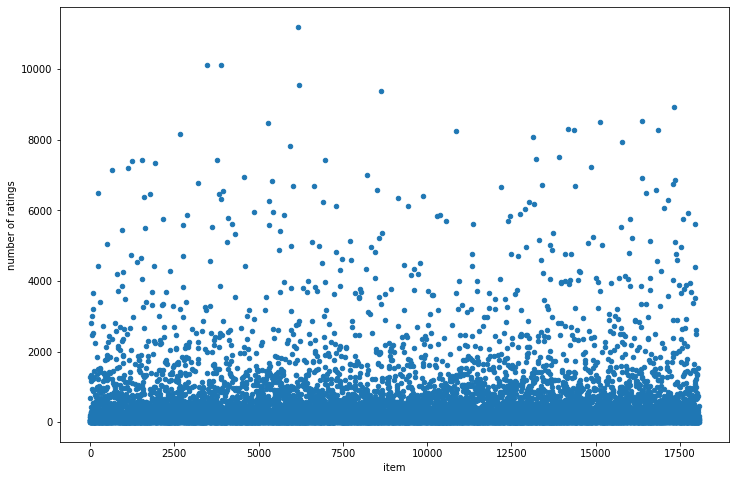

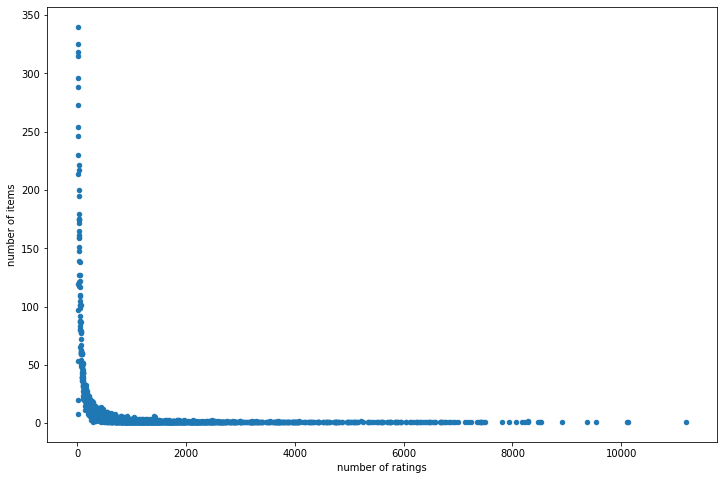

In [17]:
num_ratings_per_item = ratings.groupby("item").count()["rating"]

print(
    "The average number of ratings per item is: {}".format(num_ratings_per_item.mean())
)

num_ratings_per_item = num_ratings_per_item.reset_index(level=["item"])
num_ratings_per_item = num_ratings_per_item.rename(
    columns={"rating": "number of ratings"}
)

num_items_per_num_ratings = (
    num_ratings_per_item.groupby("number of ratings")
    .count()
    .reset_index(level=["number of ratings"])
    .rename(columns={"item": "number of items"})
)

num_ratings_per_item.plot(
    kind="scatter", x="item", y="number of ratings", figsize=(12, 8)
)

num_items_per_num_ratings.plot(
    kind="scatter", x="number of ratings", y="number of items", figsize=(12, 8)
)


In [18]:
item_content = pd.read_csv('./input/data_ICM_event.csv').rename(columns = {'row':'item','col':'feature','data':'weight'})
item_content.head()

,item,feature,weight
0,0,121781,1.0
1,1,150102,1.0
2,1,349614,1.0
3,2,9174,1.0
4,2,20833,1.0


In [21]:
def load_ICM(file_path):
    import pandas as pd
    import scipy.sparse as sps

    metadata = pd.read_csv(file_path)

    item_icm_list = metadata["row"].tolist()
    feature_list = metadata["col"].tolist()
    weight_list = metadata["data"].tolist()

    return sps.coo_matrix((weight_list, (item_icm_list, feature_list)))


ICM = load_ICM("./input/data_train.csv")

print(
    "The sparsity of the matrix is: {:.2f}%".format(
        (1 - ICM.nnz / (ICM.shape[0] * ICM.shape[1])) * 100
    )
)


The sparsity of the matrix is: 97.86%
